In [6]:
from preamble import *
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import mglearn
import seaborn as sns
from sklearn.linear_model import LogisticRegression


df_1 = pd.read_csv('1m.csv', names=['rf','class'], header=None)
df_10 = pd.read_csv('10m.csv', names=['rf','class'], header=None)

df_4 = pd.read_csv('4m.csv', names=['rf','class'], header=None)
df_6 = pd.read_csv('6m.csv', names=['rf','class'], header=None)

In [9]:
df_concat =  pd.concat([df_4,df_6], ignore_index=True).dropna(axis=0)
X = df_concat.iloc[:,0].values.reshape(-1, 1)
y = df_concat.iloc[:,1]

In [10]:
X.shape

(1825, 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.747
테스트 세트 점수: 0.792


C:\Users\deseo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 점수: 0.747
테스트 세트 점수: 0.792


In [13]:
from sklearn.svm import SVC
svc = SVC(C=1000)
svc.fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(svc.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(svc.score(X_test, y_test)))

훈련 세트 점수: 0.747
테스트 세트 점수: 0.792


C:\Users\deseo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [14]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0 최댓값은 1 임
X_train_scaled = (X_train - min_on_training) / range_on_training
# 테스트 세트에도 같은 작업을 적용하지만
# 훈련 세트에서 계산한 최솟값과 범위를 사용합니다(자세한 내용은 3장에 있습니다)
X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.747
테스트 세트 정확도: 0.792


C:\Users\deseo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [15]:
svc = SVC(1000)
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.744
테스트 세트 정확도: 0.777


C:\Users\deseo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0, 0.5, '타깃')

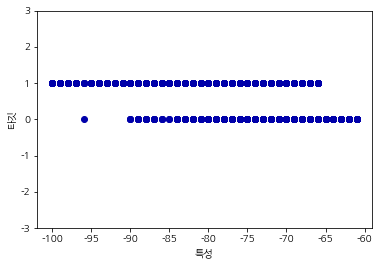

In [16]:
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [17]:
df_avg = pd.read_csv('AVG45.csv', names=['rf','class'], header=None)

In [19]:
X = df_avg.iloc[:,0].values.reshape(-1, 1)
y = df_avg.iloc[:,1]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.879
테스트 세트 점수: 0.875


C:\Users\deseo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 점수: 0.886
테스트 세트 점수: 0.871


In [22]:
df_rfavg = pd.read_csv('RFAVG45.csv', names=['rf','avg','class'], header=None)

In [23]:
X = df_rfavg.iloc[:,0:2]
y = df_rfavg.iloc[:,2]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.882
테스트 세트 점수: 0.875


C:\Users\deseo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 점수: 0.960
테스트 세트 점수: 0.871


In [26]:
df = pd.DataFrame({'B': [-1, -2, -3, -4, -5]})
df

,B
0,-1
1,-2
2,-3
3,-4
4,-5


In [27]:
df.rolling(3).sum()

,B
0,NaN
1,NaN
2,-6.0
3,-9.0
4,-12.0
